# Interrupted time series (ITS)

Interrupted Time Series (ITS) analysis is econometrics approach that allows us to evaluate the impact of an intervention or policy change that occurs at a specific point in time. Unlike DiD, ITS **does not require a control group** as it assumes that the data-generating process would have continued in a similar way without the introduction of the new policy.  ITS can be seen as a special case of a regression discontinuity design (RDD). In a typical RDD, the discontinuity is observed across different units based on a cutoff point. For example, the introduction of a special tax for plants over a certain size. ITS work in a similar way but instead of having the _discontinuity_ based on a specific variable, the **discontinuity occurs over time**. Then, we can model the time series of interest using a **segmented regression** approach as in:

\begin{equation}
    y = \beta_0 + \beta_1 \, \text{time} + \beta_2 \, \text{period} + \beta_3 \, \text{time after policy} + \varepsilon
\end{equation}

where the regression coefficients are used to capture:
- The baseline intercept ($\beta_0$).
- The pre-policy slope ($\beta_1$).
- The change in level at the introduction of the new policy ($\beta_2$). It should be noted that "period" is a dummy variable (0 or 1) that indicates whether the observation is from the period before the policy implementation (0) or after (1).
- The change in slope after the introduction of the new policy ($\beta_3$).

Let's now try to generate some data to try and apply this methodology in a practical **example**.

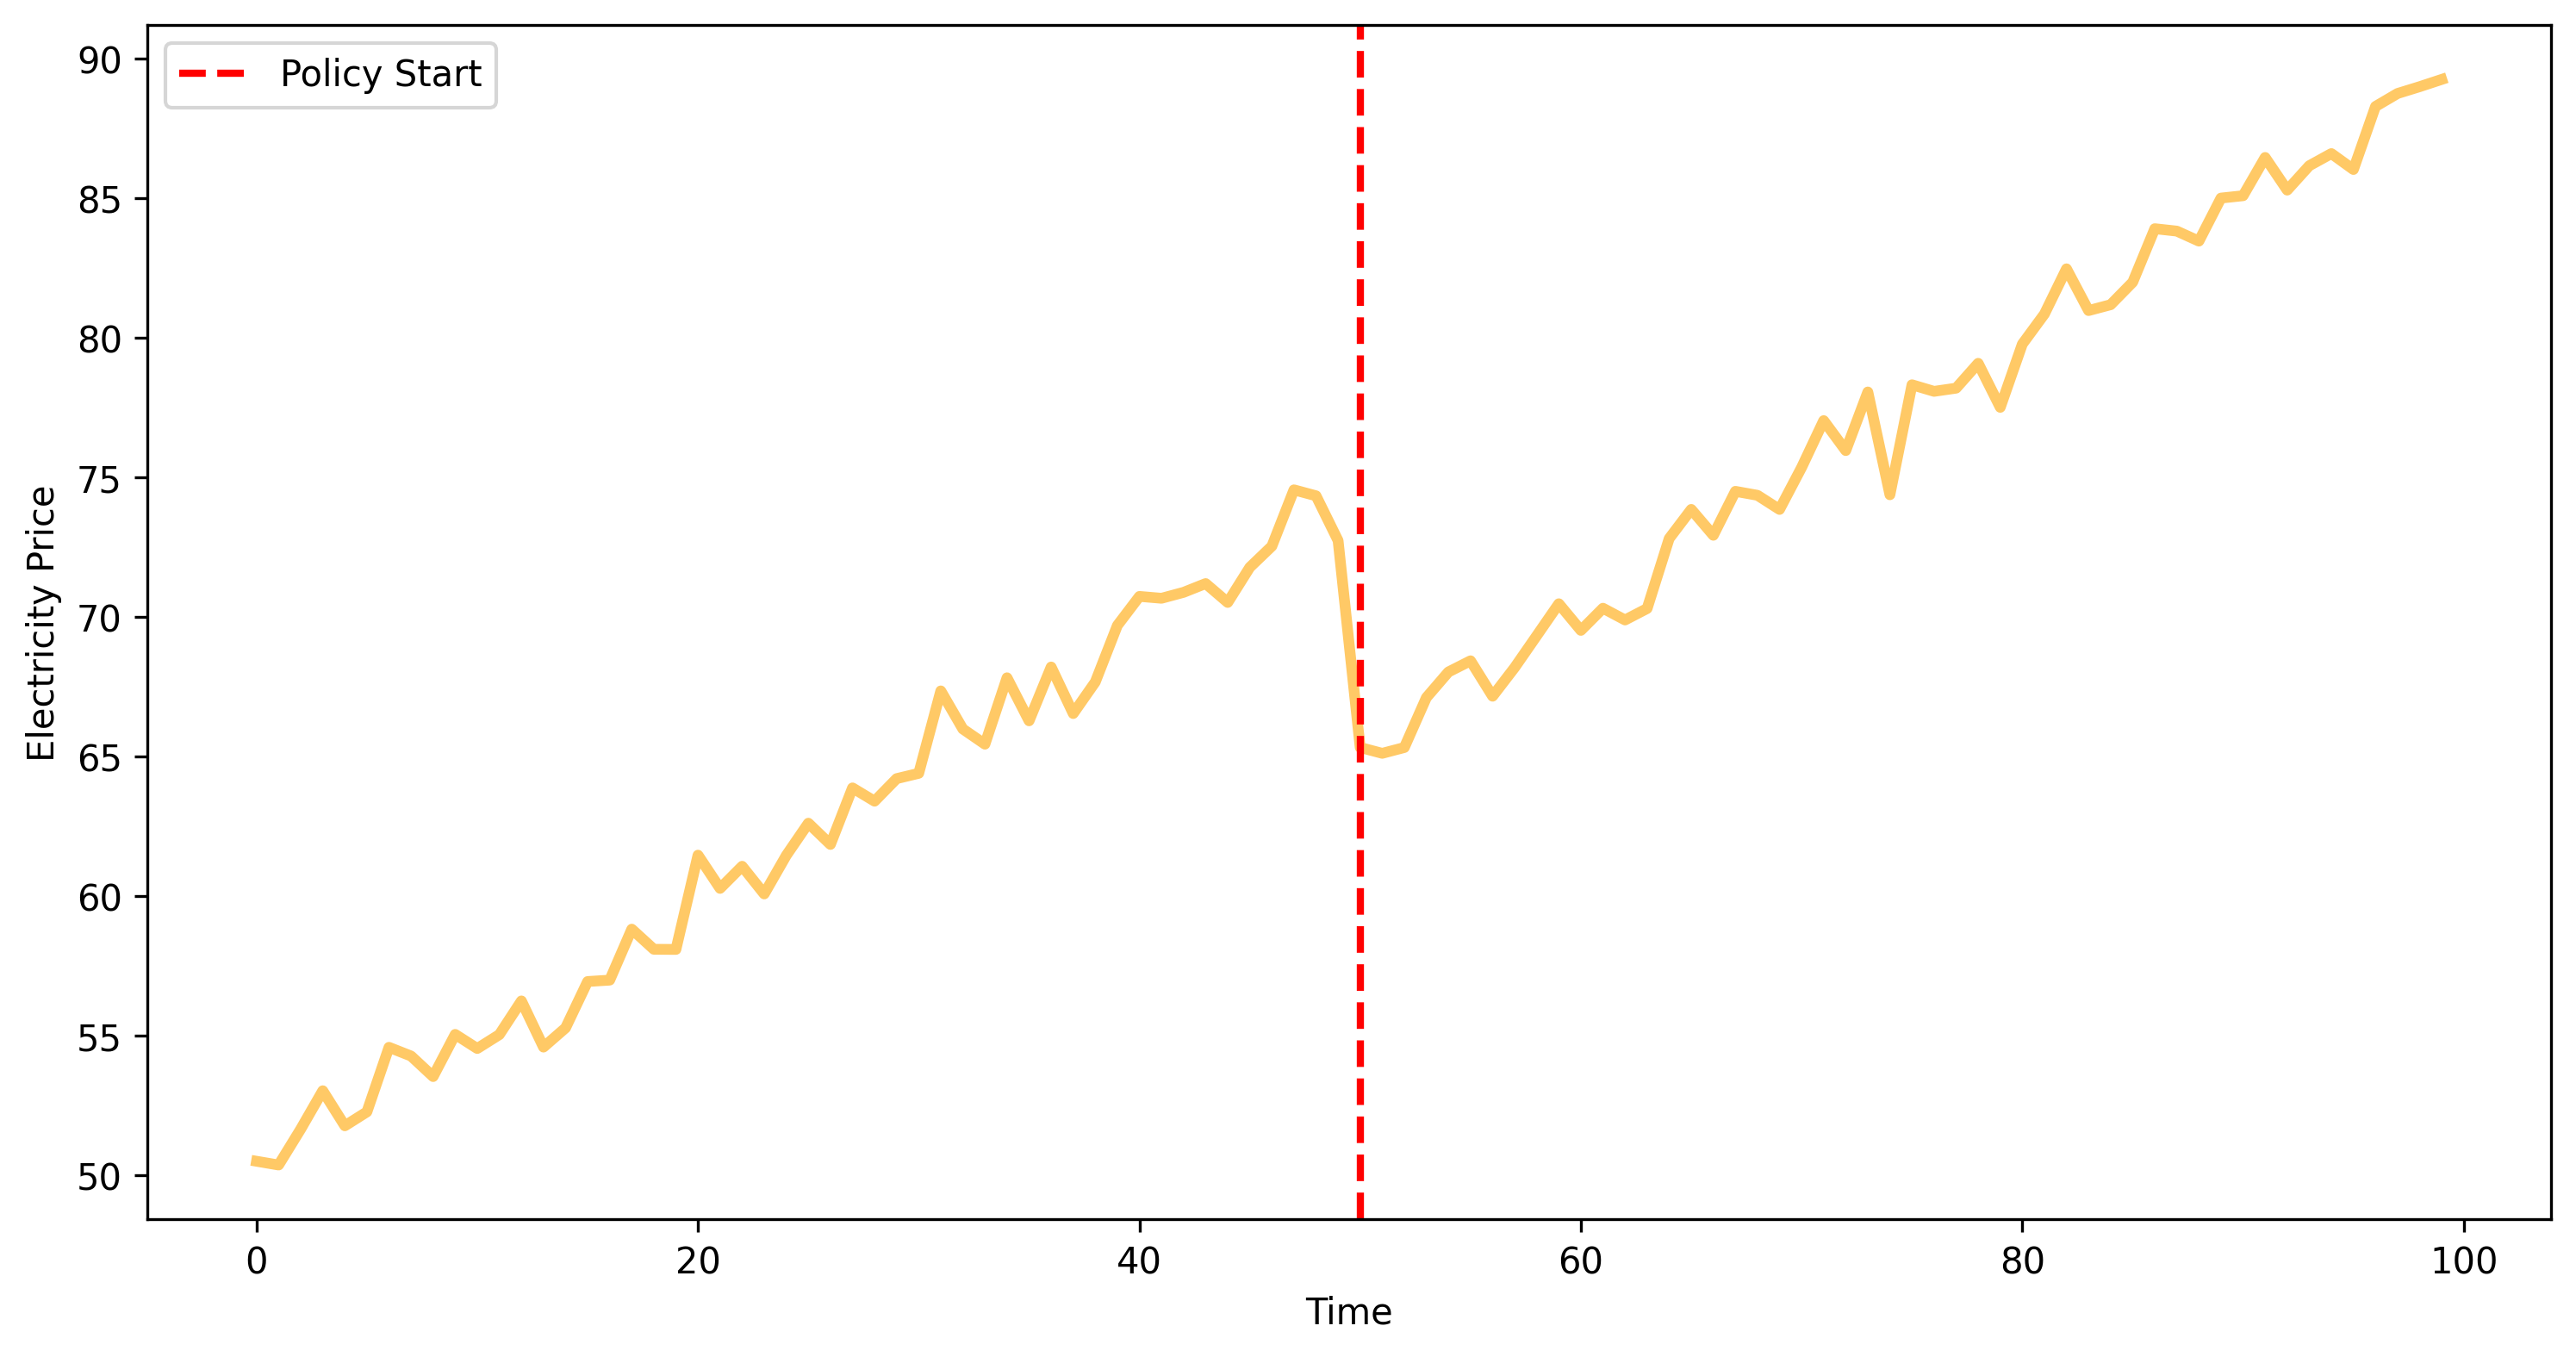

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate time series data
n_periods = 100
time = np.arange(n_periods)
policy_start = 50  # Time when the policy starts

# Generate prices with a trend and some noise
prices = 50 + 0.5 * time + np.random.normal(scale=1, size=n_periods)

# Introduce a policy effect (e.g., a reduction in prices)
prices[policy_start:] += -10

# Create a DataFrame
data = pd.DataFrame({
    'time': time,
    'price': prices
})

# Plot the data
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(data['time'], data['price'], lw=3, alpha=.6, c='orange')
plt.axvline(policy_start, color='red', linestyle='--', label='Policy Start', lw=2)
plt.xlabel('Time')
plt.ylabel('Electricity Price')
plt.legend()
plt.show()

Here, we introduced a policy at time step 50, which causes a price reduction of 10 units. Let's now create the dummy variables and fit a segmented regression model to show if we are able to estimate the effect of the policy.

In [12]:
# Create the time after policy variable
data['time_after_policy'] = np.where(data['time'] >= policy_start, data['time'] - policy_start, 0)
data['period'] = np.where(data['time'] >= policy_start, 1, 0)

import statsmodels.api as sm

# Define the independent variables
X = sm.add_constant(data[['time', 'period', 'time_after_policy']])
y = data['price']

# Fit the OLS model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     4425.
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          9.73e-103
Time:                        15:48:49   Log-Likelihood:                -129.67
No. Observations:                 100   AIC:                             267.3
Df Residuals:                      96   BIC:                             277.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                50.0644      0.25

As we can see, the results show:
- The baseline price before the policy was 50 ($\beta_0$ = const).
- The prices were increasing by approximately 0.5 units per time period before the policy ($\beta_1$ = time).
- There was an immediate reduction of 9.3 units (fairly close to 10) in the price level after the policy ($\beta_2$ = period).
- The trend (slope) of prices did not significantly change after the policy ($\beta_3$ = time_after_policy).